In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


#Load dataset using Pandas
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [226]:
# Remove rows with missing values
data.dropna(inplace=True)

In [227]:
# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

In [228]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [229]:
# Normalize or scale the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [230]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=50)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=50)

In [231]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance (Random Forest):")
print(importance_df)


Feature Importance (Random Forest):
                 Feature  Importance
10               alcohol    0.150342
9              sulphates    0.108571
1       volatile acidity    0.103699
6   total sulfur dioxide    0.102103
7                density    0.093315
4              chlorides    0.081399
0          fixed acidity    0.079157
8                     pH    0.074902
2            citric acid    0.074011
3         residual sugar    0.068778
5    free sulfur dioxide    0.063722


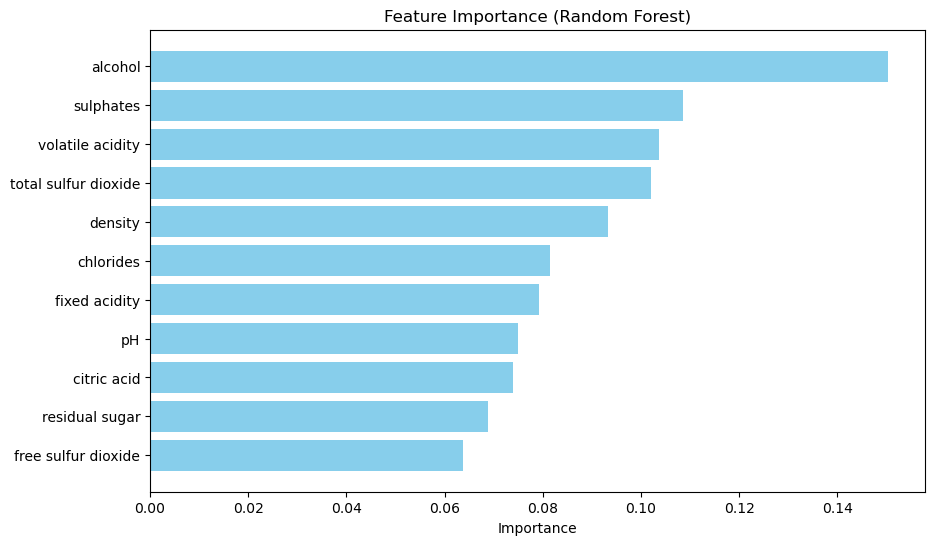

In [232]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the most important at the top
plt.show()

In [233]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.746875


In [234]:
# Initialize PCA and fit-transform the scaled features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to display explained variance ratio
pca_df = pd.DataFrame({'PC': range(1, len(explained_variance_ratio)+1), 'Explained Variance Ratio': explained_variance_ratio})

# Display explained variance ratio
print("\nExplained Variance Ratio (PCA):")
print(pca_df)



Explained Variance Ratio (PCA):
    PC  Explained Variance Ratio
0    1                  0.281739
1    2                  0.175083
2    3                  0.140958
3    4                  0.110294
4    5                  0.087208
5    6                  0.059964
6    7                  0.053072
7    8                  0.038451
8    9                  0.031331
9   10                  0.016485
10  11                  0.005414


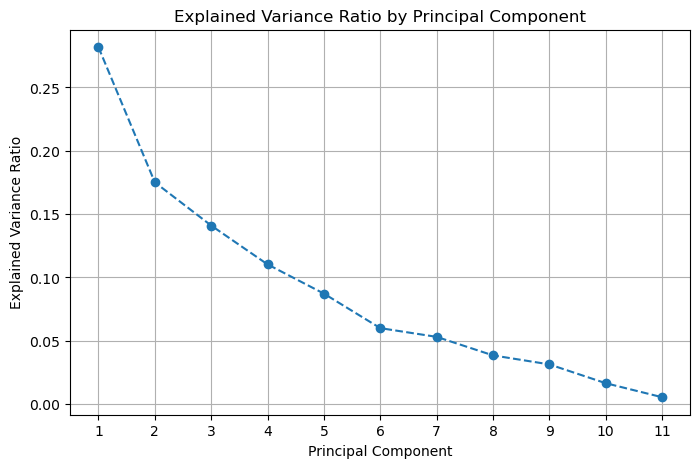

In [235]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.grid(True)
plt.show()

In [236]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.746875
